In [8]:
import pandas as pd

file = "TNX_20200129.xlsx"
xls = pd.ExcelFile(file)
xls.sheet_names

['Data Set Details',
 'Patient',
 'Diagnosis',
 'Medications',
 'Lab Results',
 'Vital Signs',
 'Procedures',
 'Terminology']

In [11]:
domain1 = pd.read_excel(file, sheet_name=xls.sheet_names[1])  # change index after you see names
domain2 = pd.read_excel(file, sheet_name=xls.sheet_names[4])

In [20]:
domain1.shape
domain1.head()

,patient_id,sex,race,ethnicity,year_of_birth,age_at_death,postal_code
0,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,F,Unknown,Not Hispanic or Latino,1980,NaN,NaN
1,c45f42c418ebd65d25d10276a3f2a8ba33d7d6c5,F,Unknown,Hispanic or Latino,1997,NaN,NaN
2,9cab24d7325547465b6439a5aea68b6efebace47,F,White,Hispanic or Latino,1970,NaN,NaN
3,22e3b3b96da711bdf73d24fe6886c083f12ca3e2,F,White,Not Hispanic or Latino,1984,NaN,NaN
4,580043e2b64b6e170ad284101375bdedd71ec231,M,White,Not Hispanic or Latino,1991,NaN,NaN


In [21]:
domain2.shape
domain2.head()

,patient_id,encounter_id,code_system,code,date,lab_result_num_val,derived_by_TriNetX
0,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,7ec55977affd4f27497ae22f4723686bb7c76d59,LOINC,13945-1,20190628,1.0,F
1,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,7ec55977affd4f27497ae22f4723686bb7c76d59,LOINC,17861-6,20190628,10.0,F
2,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,7ec55977affd4f27497ae22f4723686bb7c76d59,LOINC,19023-1,20190628,71.3,F
3,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,7ec55977affd4f27497ae22f4723686bb7c76d59,LOINC,1920-8,20190628,16.0,F
4,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,7ec55977affd4f27497ae22f4723686bb7c76d59,LOINC,1975-2,20190628,0.6,F


In [26]:
(patient.isna().mean() * 100).round(1)

patient_id         0.0
sex                0.0
race               0.0
ethnicity          0.0
year_of_birth      0.0
age_at_death      92.1
postal_code      100.0
dtype: float64

In [27]:
patient.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,38,38,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,38,2,F,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,38,3,White,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ethnicity,38,3,Not Hispanic or Latino,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_birth,38.0,NaN,NaN,NaN,1976.684211,16.528608,1940.0,1965.25,1979.5,1988.5,2000.0
age_at_death,3.0,NaN,NaN,NaN,60.333333,5.131601,56.0,57.5,59.0,62.5,66.0
postal_code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Domain 2 -- Lab Results data quality assessmemnt 

labs = pd.read_excel("TNX_20200129.xlsx", sheet_name="Lab Results")

labs.head()
labs.shape
labs.columns

Index(['patient_id', 'encounter_id', 'code_system', 'code', 'date',
       'lab_result_num_val', 'derived_by_TriNetX'],
      dtype='object')

In [29]:
(labs.isna().mean() * 100).round(1)

patient_id            0.0
encounter_id          0.0
code_system           0.0
code                  0.0
date                  0.0
lab_result_num_val    0.0
derived_by_TriNetX    0.0
dtype: float64

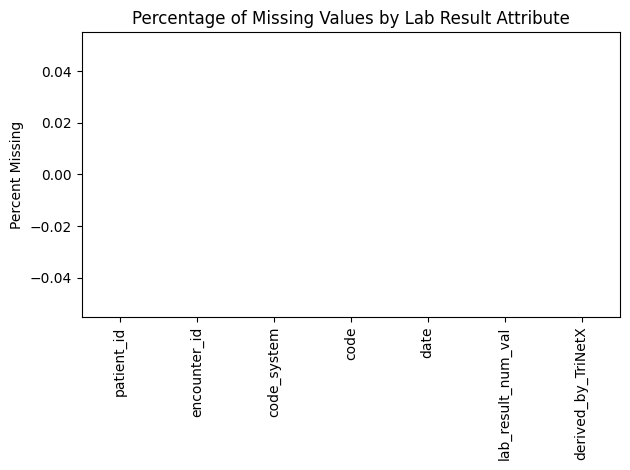

In [31]:
import matplotlib.pyplot as plt

(labs.isna().mean() * 100) \
    .sort_values(ascending=False) \
    .plot(kind="bar", title="Percentage of Missing Values by Lab Result Attribute")

plt.ylabel("Percent Missing")
plt.tight_layout()

In [35]:
code_of_interest = "742-7"

labs["code"].value_counts().head()

code
742-7      2063
2160-0     1858
2345-7     1833
2823-3     1818
17861-6    1815
Name: count, dtype: int64

In [36]:
labs[labs["code"] == code_of_interest].shape

(2063, 7)

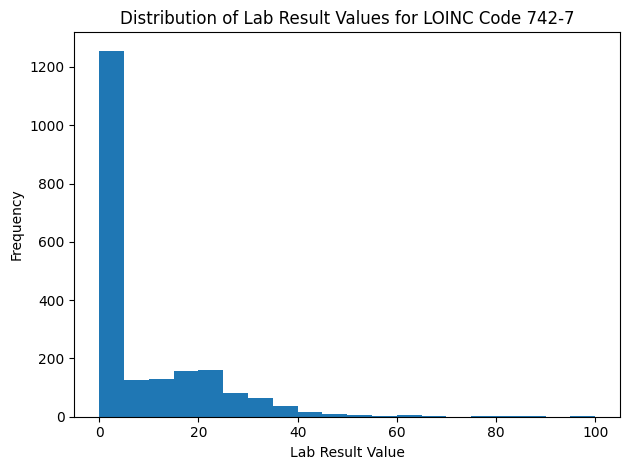

In [37]:
labs[labs["code"] == code_of_interest]["lab_result_num_val"].plot(
    kind="hist",
    bins=20,
    title="Distribution of Lab Result Values for LOINC Code 742-7"
)

plt.xlabel("Lab Result Value")
plt.ylabel("Frequency")
plt.tight_layout()

In [38]:
labs["date"] = pd.to_datetime(labs["date"], format="%Y%m%d", errors="coerce")

In [40]:
labs_by_year = (
    labs
    .groupby(labs["date"].dt.year)
    .size()
)

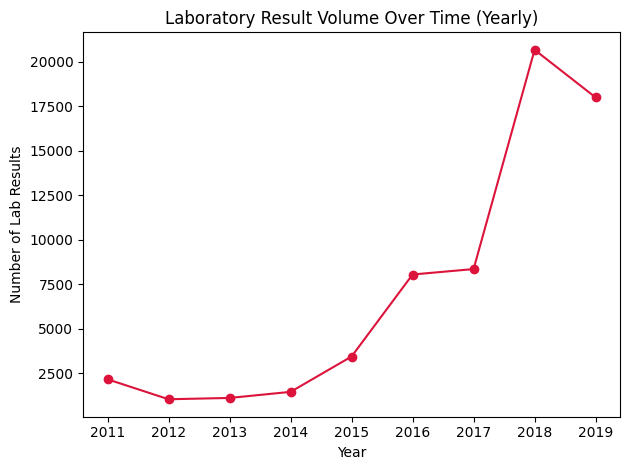

In [42]:
labs_by_year.plot(
    kind="line",
    marker="o",
    color="crimson",
    title="Laboratory Result Volume Over Time (Yearly)"
)

plt.xlabel("Year")
plt.ylabel("Number of Lab Results")
plt.tight_layout()